# M&P2 EM Python Activity 2022: Applying electrostatics to build a computational model

In this activity, you'll build up a simple model and then apply it to two chemistry-relevant situations.

The structure of the activity is:

1. Write functions to calculate E field and potential due to a point charge, and to evaluate the E field, potential and potential energy due to a system of charges. 
    - Test that these functions work by comparing to two systems for which you know the analytic result: the finite line charge and the symmetric ring of charge (both considered in problem sheets).
2. Apply these functions to consider simplified scenarios relating to electrochemistry:
    - the hydration shell around a sodium ion dissolved in water
    - behaviour of water molecules close to an electrode

The functions you define in part 1 will be useful in part 2, and you'll need the functions from part 1 in part 2.

To help you concentrate on the physics elements of the coding, a large proportion of the code you need will be provided for you. Note that the Jupyter notebook already released (look in Content and Resources on Blackboard) shows you how to make fieldline plots, 3D vector-field plots and contour plots in 2D and 2D, and you should make free use of the code there, supplemented by online searches for any further modifications you would like to make.

### Coding tips

Some of you will have more experience with coding than others. Here are some tips, particularly for those of you with less experience:

When writing code, an important element of good practice is to check at different stages that the code is generating the results you expect, so you should always try to compare code output to known cases. This is what you will be doing with the ring of charge and also by plotting the water molecule orientations in part 2 to help visualise what the code is doing. When you are generating arrays, when first running the code, check each one contains something like what you are expecting by printing the values of some elements. Your code might run without crashing and reporting an error (no "compile-time" errors), but this does not necessarily mean that it is free from ("run-time") errors (where it does something different from what you intended), so it's important to do other checks so you can be confident it is working as intended.

A second element of sensible coding practice is to make use of online searches to find out how to use code syntax etc. Of course you can also refer back to the Python course and coding you have already done. With online search results, be selective about which results to pay attention to. Although you can find dictionary/manual-style definitions in the official documentation, to start off with it is usually more helpful to see an example piece of code where the syntax is used. Well put-together tutorial-style sources are usually good for this; beware random un-thought-out posts on say stackexchange - the solutions these present are not always the easiest approach.

If you're not very familiar with Jupyter notebooks, here are a few short tips:

- There are two types of cell, 'code' and 'markdown' (this text is in a markdown cell). To change between the two, select the cell by clicking to its left (bar turns blue) and then choose Y (for code) or (M for markdown).
- Use shift-Enter to finish editing a markdown cell or to run a code cell. Double-click a markdown cell to start editing it.
- Look at the Help menu to find more keyboard shortcuts and other help.
- The kernel 'remembers' between different code cells, so, for example, once you have run a code cell which defines a function, it remembers the definition for any other cell you execute and similarly, once you have imported a package, it remembers this. If you re-open a notebook or restart the kernel, it's a new kernel so you'll need to run the code again.
- To avoid confusion, write your code so that it will work if run in sequence from the top - e.g. by using the Cell menu, i.e., avoid writing your code so it only works if you run particular cells in a particular order. (You can quickly end up getting confused if you do this!)

If you find yourself copying and pasting code from one part of the program to re-use it in another, consider defining a function. This can often make your life much easier and simpler.

Debugging code to remove errors is perhaps the key skill of coding in practice. It will be much easier to track down errors in your code if you do the following:
- Include comments in your code (so you remember what it does later) - be specific and note the units of quantities used 
- Use appropriate/descriptive variable names which correspond to what the variable is
- Print the values of variables / check the dimensions of arrays (e.g. with len or np.shape) at different points in the code to check their values are what they should be / plot graphs of arrays (label axes and include titles). This can be particularly useful to trace a problem back to its source.
- When modifying code during debugging, it is often a good idea to keep the previous version of the line you are changing rather than deleting it: duplicate the line you are changing on the line above and comment this out, just in case you decide later you want to change back to the earlier version

## Part 1: Building a simple molecular model to calculate E fields and potentials

One useful feature of numerical methods is that they enable you to find solutions where analytic solutions either do not exist or are complicated, often with very little additional coding. This is what we will try to take advantage of through this code.

### 1A. Modelling a set of charges: Potential, electric field and potential energy

Consider a situation where there is a charge q1 at position r1 (that is, $\vec{r_1}$):

Write a Python function ```potl``` taking r0, r1 and q1 as inputs. The function should return the potential at position r0 (that is, $\vec{r_0}$).

The first step is to import numpy, since you will need this in several places, and also a plotting package:


In [1]:
#%matplotlib notebook 
#you might need to uncomment this in order to rotate the 3d plots we will use later
#%matplotlib widget
#%matplotlib inline

import numpy as np #import the numpy package since this will be useful
import matplotlib.pyplot as plt #plotting package
from ipywidgets import interact

In [2]:
N=5
e=1.602e-19 #in Coulombs
eps0=8.85e-12
K=1/(4*np.pi*eps0)

def dist(r0,r1):
    if len(r0)==3:
        return np.sqrt(abs((r0[0]-r1[0])**2+(r0[1]-r1[1])**2+(r0[2]-r1[2])**2))
    elif len(r0)==2:
        return  np.sqrt(abs((r0[0]-r1[0])**2+(r0[1]-r1[1])**2))
    else:
        print('Dimension error')

def unit_v(r0,r1):
    return (-r1+r0) / np.linalg.norm((r1-r0))

In [3]:
#Here is a reminder of the syntax for declaring a function in Python:

def potl(r0,r1,q1):
    #print(dist(r0,r1))
    V=K * (q1*e/dist(r0,r1))
    
    #edit this equation!        
    return V

#test here and compare with the result you get if you use pen and paper and a calculator
ra=np.array([0,0,0])
rb=np.array([1,1,1])
qb=1
rc=np.array([2,1,1])
qc=1.5
#decide what units you are going to use for r and q and make sure you are consistent with these
print('For charges of 1 [qC] at (0,0,0) and (1,1,1) [meter] and 1.5 [meter] at (2,1,1) [meter] \
      \nPotential I find by calculating manually using a calculator is 8.32e-10 [Volt] and 8.82e-10 [Volt]')
      

#As illustrated above, testing and printing values of variables at particular points in your code to compare 
#  to what you expect to find is a good way to debug
#
#Including relevant precise description will often help you a lot with debugging
#
#Including comments in your code & naming variables with relevant names (rather than a,b,c etc) is also very helpful when debugging

#Note the syntax below for how to format text strings in Python using %
# and also how to use the \ character to break input over additional lines
potl1=potl(ra,rb,qb)
print('potl() function result: Potential is %.2e [Volt] at (%.1e,%.1e,%.1e) A for charge %d [qC]\
at (%.1e,%.1e,%.1e) [meter]' % (potl1,ra[0],ra[1],ra[2],rb[0],rb[1],rb[2],qb))

potl2=potl(ra,rc,qc)
print('potl() function result: Potential is %.2e [Volt] at (%.1e,%.1e,%.1e) A for charge %d [qC]\
at (%.1e,%.1e,%.1e) [meter]' % (potl2,ra[0],ra[1],ra[2],rc[0],rc[1],rc[2],qc))

For charges of 1 [qC] at (0,0,0) and (1,1,1) [meter] and 1.5 [meter] at (2,1,1) [meter]       
Potential I find by calculating manually using a calculator is 8.32e-10 [Volt] and 8.82e-10 [Volt]
potl() function result: Potential is 8.32e-10 [Volt] at (0.0e+00,0.0e+00,0.0e+00) A for charge 1 [qC]at (1.0e+00,1.0e+00,1.0e+00) [meter]
potl() function result: Potential is 8.82e-10 [Volt] at (0.0e+00,0.0e+00,0.0e+00) A for charge 2 [qC]at (1.0e+00,1.0e+00,1.5e+00) [meter]


Write another Python function ```Efield``` taking r0, r1 and q1 as inputs, which calculates the electric field (vector) at position r0.

In [4]:
def Efield(r0,r1,q1):
    #r0 and r1 should be numpy arrays with 3 elements
    E=K* (q1*e/dist(r0,r1)**2)*unit_v(r0,r1)
    #add calculation of E here
    return E

#test out that your function works
Ea=Efield(ra,rb,qb)
print('E field is (%.2e,%.2e,%.2e) [N/C] at (%.1e,%.1e,%.1e) [meter] for charge %d [qC] \
at (%.1e,%.1e,%.1e) [meter]' % (Ea[0],Ea[1],Ea[2],ra[0],ra[1],ra[2],rb[0],rb[1],rb[2],qb))

E field is (-2.77e-10,-2.77e-10,-2.77e-10) [N/C] at (0.0e+00,0.0e+00,0.0e+00) [meter] for charge 1 [qC] at (1.0e+00,1.0e+00,1.0e+00) [meter]


For lists of charges $q_i$ at positions $r_i$, use the functions you have already written to create two new functions, taking r0, ri and qi as inputs:

Write a function to calculate the total potential at r0

In [5]:
def potl_sum(r0,ri,qi):
    V_sum = 0
    for i in range(len(ri)):
        V = potl(r0,ri[i],qi[i])
        V_sum += V
    return V_sum #return the total potential

Write a function to calculate the net electric field at r0

In [6]:
def Efield_sum(r0,ri,qi):
    E_sum = 0
    for i in range(len(ri)):
        E = Efield(r0,ri[i],qi[i])
        E_sum += E
    return E_sum #return the total potential

Now write a function which calculates the energy of a whole system of charges $q_i$ with positions $\vec{r_i}$.

One way to work this out would be to think about adding all the charges to they system by bringing each in from infinity, one at a time. The code below does this for you! Remember that when adding a new charge you need to account for the effect of *each* of the charges which are already present.

In [7]:
#adapt the function below or write your own!
def potl_energy_sum(ri,qi):
    U=0 #initialise the total potential energy
    chargeadded=[] #list of indices of charges already added
       
    for loop in range(len(qi)): #loop over each charge in turn
        #....incomplete code below which you can use as a starting point
        for j in chargeadded: #loop over charges already added (bringing charge loop towards charge j)            
            Uij=e*qi[j] * potl(ri[j],ri[loop],qi[loop])
            #print('Adding PE %.2e [units] of bringing charge %d towards charge %d' % (Uij,loop,j))
            U=U+Uij
        chargeadded.append(loop) #add the index of the added charge to the list
    #print('Total PE is %.2e [units]' % U)
    return U #return the total potential energy

**In your report**, include a *brief* description of the physics (the equations and any other important details) you have used.

##### Code check: Charges round a ring

In problem sheet 2 question 4, you calculated the total energy for charges uniformly spaced round a ring. The code below is provided so that you can check that the function you have written above gives the same answer as you know from that. If it does, your code is probably correct. If it doesn't, your code is not fully correct, so go back and look for the error...

In [8]:
N=5
e=1.602e-19 #in Coulombs
eps0=8.85e-12
q=1 #charge round outside in qC units
q0=-1 #charge at centre in qC units
a=1e-10 #radius of ring in m

U5ps=1.88*(q*e*-q0*e)/(4*np.pi*eps0*a) #answer for N=5 charges
print('Problem sheet 2 Q4, N=5, q=e, q0=-e, a=0.1nm: U=1.88q.q0/(4pi.eps0r)=%.2e J' % (U5ps))

#generate positions of charges round the ring
ind=np.arange(N) #charge indices: 0,1,2,...,N-1
x=np.cos(2*np.pi*ind/N) #charge x-coordinates
y=np.sin(2*np.pi*ind/N) #charge y-coordinates
z=np.zeros(N) #all charges in plane z=0
qi=q*np.ones(N) #all charges have same value, q

x=np.concatenate(([0.0],x)) #add a first element at the origin, which is the coordinate of the central charge
y=np.concatenate(([0.0],y))
z=np.concatenate(([0.0],z))

ri=np.transpose([x,y,z])*1e-10
qi=np.concatenate(([q0],qi)) #central charge has charge q0
#r0=[0,0,0]

#print(ri)

#print(qi)

U=potl_energy_sum(ri,qi)
print('Python code calculated value for N=%d, a=%.2e [m]:  U=%.2e [J]' % (N,a,U))

Problem sheet 2 Q4, N=5, q=e, q0=-e, a=0.1nm: U=1.88q.q0/(4pi.eps0r)=4.34e-18 J
Python code calculated value for N=5, a=1.00e-10 [m]:  U=4.34e-18 [J]


### Electric field and potential around a finite line charge 

Now consider a line charge of *finite length* between $(-L,0,0)$ and $(+L,0,0)$.

Write some code to find numerically the potential and electric field and any coordinate $(x,y,z)$. Hint: you can build this up by breaking down the line charge into many equal discrete charges equally spaced along the line.

To check your code is working, compare your answer with $E(z)$ as given by the analytic expression for electric field along the line $(0,0,z)$ for an *infinite* line charge with the same charge per unit length $\lambda$. You should have obtained this on the problem sheet.

Include the following things in your report:

- Plot your computed $E(z)$ along the line $(0,0,z)$ for the *finite* line charge. On the same plot, also plot $E(z)$ as given by the analytic expression for electric field along the line $(0,0,z)$ for an *infinite* line charge with the same charge per unit length $\lambda$. Discuss whether you would expect them to agree.
- Plot your computed $V(z)$ along the line $(0,0,z)$ for the *finite* line charge. On the same plot, also plot $V(z)$ as given by the analytic expression for electric field along the line $(0,0,z)$ for an *infinite* line charge with the same charge per unit length $\lambda$. Discuss whether you would expect them to agree.
- Use your code to numerically find the E field in the region $(x,0,z)$, for $x>0$ and $z>0$ and plot out the electric field in this plane.
- Use your code to numerically find the potential in the same region and make a contour plot of this.
- Make some comments about the form of these plots (how the form relates to the physics etc)

In [9]:
L = 4 # in [m]
nq = 200 #total number of charge from -L to +L
lambda_q = 30 # parameter, charge per unit length, in [qC/m]

#Thus, qi (charge per discrete charge) can be calculated, in [qC]
qi = np.full(nq,lambda_q*2*L/nq) #charge per discrete charge, in [qC]

#Generate the ri, for all the charges
ri = []
for i in np.linspace(-L,+L,nq):
    ri.append([i,0,0])
ri = np.array(ri)


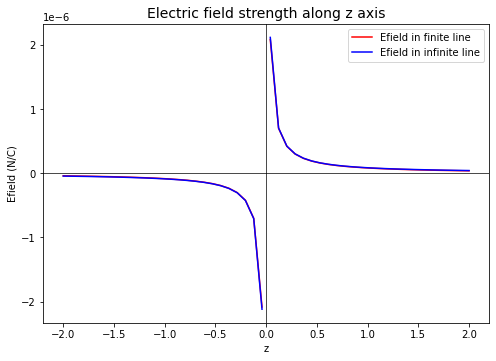

In [30]:
Efield_z = []
num_samp = 50 # number of sampling along z axis
z = 2 #sampling length along z axis
for i in np.linspace(-z,+z,num_samp):
    Efield_z.append([0,0,i])
Efield_z_only = np.linspace(-z,+z,num_samp)

#calculate the sampling point under the effect of the finite line and infinite one
E_finiteLine = []
E_infiniteLine = []
for i in Efield_z:
    E_finiteLine.append(Efield_sum(i,ri,qi)[2])
    #minus sign means the vector should point from the charge along the line to the test point sampling along z axis
    #print(-Efield_sum(i,ri,qi))
    E_infiniteLine.append(2*K*lambda_q*e/i[2])

#seperate the positive and negtive parts
E_finL_posi = []
E_finL_neg = []
E_infinL_posi = []
E_infinL_neg = []
z_finL_posi = []
z_finL_neg = []
z_infinL_posi = []
z_infinL_neg = []

for i in range(len(Efield_z_only)):
    if E_finiteLine[i]>0:
        E_finL_posi.append(E_finiteLine[i])
        z_finL_posi.append(Efield_z_only[i])
    else:
        E_finL_neg.append(E_finiteLine[i])
        z_finL_neg.append(Efield_z_only[i])        
    if E_infiniteLine[i]>0:
        E_infinL_posi.append(E_infiniteLine[i])
        z_infinL_posi.append(Efield_z_only[i])
    else:
        E_infinL_neg.append(E_infiniteLine[i])
        z_infinL_neg.append(Efield_z_only[i])  

#Plot the electric field strength against z axis
plt.figure(figsize=(8,5.5)) 
plt.title('Electric field strength along z axis',fontsize=14)
plt.plot(z_finL_posi, E_finL_posi, marker='', label='Efield in finite line',color='r')
plt.plot(z_finL_neg, E_finL_neg, marker='',color='r')
plt.plot(z_infinL_posi, E_infinL_posi, marker='', label='Efield in infinite line',color='b')
plt.plot(z_infinL_neg, E_infinL_neg, marker='',color='b')

plt.xlabel('z')
plt.ylabel('Efield (N/C)')
plt.axvline(0,linewidth=0.7,color='black')
plt.axhline(0,linewidth=0.7,color='black')
plt.legend()
plt.show()

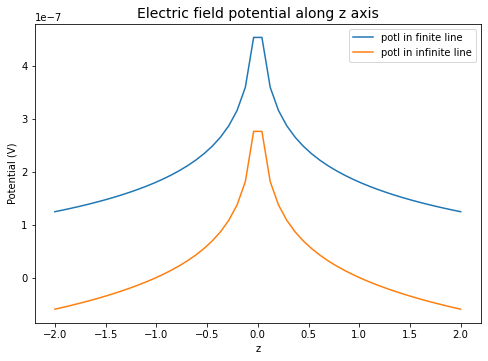

In [11]:

#calculate the sampling point under the effect of the finite line and infinite one
V_finiteLine = []
V_infiniteLine = []
for i in Efield_z:
    V_finiteLine.append(potl_sum(i,ri,qi))
    V_infiniteLine.append(2*K*lambda_q*e*np.log(1/abs(i[2])))
    #print(np.log(abs(i[2])))
          
plt.figure(figsize=(8,5.5)) 
plt.title('Electric field potential along z axis',fontsize=14)
plt.plot(Efield_z_only, V_finiteLine, marker='', label='potl in finite line')
plt.plot(Efield_z_only, V_infiniteLine, marker='', label='potl in infinite line')

plt.xlabel('z')
plt.ylabel('Potential (V)')
plt.legend()
plt.show()

In [12]:
#Set all the test points and vectors for each points

ri_2D = []
for i in np.linspace(-L,+L,nq):
    ri_2D.append([i,0])
ri_2D = np.array(ri_2D)

#generate the mesh points for Efield
x_list = []
z_list = []
num_samp_x = 80 # number of sampling along x,z axis
len_x =5 #sampling length along x axis
num_samp_z = 80 # number of sampling along z axis
len_z = 5 #sampling length along z axis
x_samp=np.linspace(-len_x,+len_x,num_samp_x)
z_samp=np.linspace(-len_z,+len_z,num_samp_z)

xx_samp, zz_samp = np.meshgrid(x_samp, z_samp)
coord_samp =np.stack((xx_samp, zz_samp),axis=-1)

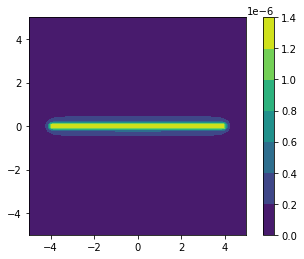

In [13]:
#polt contour for Efield
z_Efield = coord_samp
z_Efield_magni = []

for i in range(len(coord_samp)):
    aList=[]
    for j in range(len(coord_samp[i])):
        aList.append(np.linalg.norm(-Efield_sum(coord_samp[i][j],ri_2D,qi)))
    z_Efield_magni.append(aList)

#print(z_Efield_magni)
plt.contourf(xx_samp, zz_samp, z_Efield_magni)
plt.axis('scaled')
plt.colorbar()
plt.show()

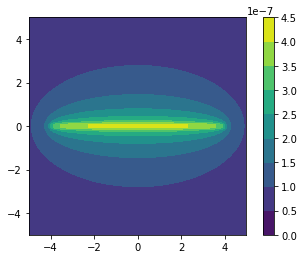

In [14]:
#polt potl for Efield
z_potl_magni = []

for i in range(len(coord_samp)):
    aList=[]
    for j in range(len(coord_samp[i])):
        aList.append(potl_sum(coord_samp[i][j],ri,qi))
    z_potl_magni.append(aList)

#print(z_Efield_magni)
plt.contourf(xx_samp, zz_samp, z_potl_magni)
plt.axis('scaled')
plt.colorbar()
plt.show()

## Part 2: Building a model for water molecules

Now you'll apply the functions you've written to deal specifically with water molecules, ready to use these in the final part to consider some chemistry-relevant applications.

In chemistry, often you are dealing with molecules rather than isolated charges.  Since you know the relative positions of the atoms in the molecules, rather than describing a configuration of molecules in space by specifying the position of every single atom, it's sufficient to specify the location of one atom in each molecule and also the *orientation* of that molecule. Since it is an orientation in 3D, two angles are required for this (representing angles of rotation away from a starting or base orientation), and a convenient way is to make use of spherical polar coordinates. You have seen these before in chemistry (e.g., check pages 9 and 10 of the Introduction to Spectroscopy lecture-6 slides) or look (for example) [here](https://www.quora.com/How-can-I-change-spherical-coordinates-of-a-point-into-Cartesian-coordinates) for a page online which gives a brief summary which should be all the information you need.

Below is some code you can use to visualise the positions and orientations of one or several molecules. It could be used for any molecule. The code is provided for a linear molecule, CO$_2$.

You can run it without making any changes, to see how it works. Further details of the functions are provided later.

In [15]:
#need to import numpy and pyplot packages before running this cell

#coordinates (r,phi,theta) in spherical polars are, in Cartesians:
#(x,y,z)=(r*sin(phi)cos(theta),r*cos(phi)*sin(theta),r*cos(theta))
#using physics conventions for theta and phi (beware that mathematicians sometimes define these the other way round)
#theta is the angle measured rotating away from the +z axis
#phi is the angle measured rotating around the z axis, in the xy plane, measured anticlockwise from the +x axis.

Natomslist=[3,3,1] #list numbers of atoms in each type of molecule#.  type 0 is CO2, type 1 is water
totalatomtypes=sum(Natomslist)
atomindices=[[0,1,2],[3,4,5],[6,]] #give each distinct atom in each molecule a different index. The three atoms in type 0 are numbered 0,1,2 etc
#this will be useful so we can plot the different atoms with different colours
cols='krrryyb' #define the colour of each atom type

#Python allows some shorthand syntax which you can use to save space if you are setting lots of variables to a value:
#
#a,b,c=1.0,2.0=3.0
#
#is the same as
#a=1.0
#b=2.0
#c=3.0
#
#this is used in the next function

def atom_base_positions(type):
    #return the coordinates of each atom of the molecule of this type
    #in spherical polar coordinates, relative to an 'anchor' at the origin
    if type==0: #definitions for CO2
        d=160e-3 #C-O length in nm
        p=0.1*3.3356e-30 #C-O dipole moment magnitude in SI units Cm (using value for CO; C-O bond dipole in CO2 hard to measure as the two dipoles cancel out and the molecule has no net dipole)
        qeff=(p/(d*1e-9))/1.602e-19 #effective charge in units of e
        Na=3
        r,phi,theta,q=np.empty(Na),np.empty(Na),np.empty(Na),np.empty(Na)
        r[0],phi[0],theta[0],q[0]=0.0,0.0  ,0.0   ,+2*qeff #place the C atom at the origin
        r[1],phi[1],theta[1],q[1]=d  ,0.0  ,0.0   ,-qeff #O atom 1, a distance d from the origin at angle theta=0, phi=0 (so along the +z axis)
        r[2],phi[2],theta[2],q[2]=d  ,0.0  ,np.pi ,-qeff #O atom 2, a distance d from the origin at angle theta=pi, phi=0 (so along the -z axis)            
        
    elif type==1: #definitions for water (incomplete)
        d=0.09578 #O-H bond length in nm
        p=1.85*3.3356e-30 #O-H dipole moment magnitude in SI units Cm 
        qeff=(p/(d*1e-9))/1.602e-19 #effective charge in units of e
        Na=3
        r,phi,theta,q=np.empty(Na),np.empty(Na),np.empty(Na),np.empty(Na)
        r[0],phi[0],theta[0],q[0]=0.0,0.0  ,0.0   ,-2*qeff #place the O atom at the origin
        r[1],phi[1],theta[1],q[1]=d  ,0.0  ,151/720*np.pi   ,+qeff #O atom 1, a distance d from the origin at angle theta=0, phi=0 (so along the +z axis)
        r[2],phi[2],theta[2],q[2]=d  ,0.0  ,((1-151/720)*np.pi) ,+qeff #O atom 2, a distance d from the origin at angle theta=pi, phi=0 (so along the -z axis)            
        #your code here
    
    elif type==2: #definitions for Na+
        Na=1
        r,phi,theta,q=np.empty(Na),np.empty(Na),np.empty(Na),np.empty(Na)
        r[0],phi[0],theta[0],q[0]=0.0,0.0 ,0.0   ,+1 #place the Na atom at the origin
    
    else:
        r,phi,theta,q=np.array([]),np.array([]),np.array([]),np.array([]) #if type is not set then return empty lists

    return r,phi,theta,q

Further details of what the function above does are given in the next paragraph.  You can skip these until you have tried out using the function.

The atom_base_positions function returns arrays of position vectors and charges describing the positions of every atom in the molecule and its charge, relative to an anchor position (such as the position of one of the atoms in the molecules). The input is the molecule type. The code provided for a CO$_2$ molecule (type 0) is included. Later, you will need to complete the code so that it returns the positions of the atoms in a water molecule for type 1.

The atom_base_positions function above is used in the functions **provided for you** by the code below. 

You should not need to modify the code below. Feel free not to even read the code below but just use it. It defines:

mol_plot(moltypes,xa,ya,za,phia,thetaa). This makes a 3D plot of the positions of molecules with the type in the array moltypes (0 for CO2 or 1 for water etc) and with anchors at locations stored in xa, ya and za and orientiations store in phia and thetaa. It returns handles to the plot so that you can modify things like the axis labels. There is an example of how to use it in the cell below.

allatomposns(moltypes,xa,ya,za,phir,thetar) has the same input arguments. It returns the coordinates of all the atoms in the molecules and their charges. You should be able to use these outputs with the functions you already have in order to find the electric field and potential.
There is an example of how to use it in the cell below.

The code below also defines a function rotmol_atomposns(moltype,rmtranslation,phimrot,thetamrot). This is called by each of the other two functions. You probably won't need to call it directly yourself. It returns the positions of atoms in a particular molecule according to the position of the anchor and orientation of the molecule.

**PROVIDED CODE FOR YOU TO USE - NO NEED TO MODIFY** (it is not important to understand the code)

In [16]:
def rotmol_atomposns(moltype,rmtranslation,phimrot,thetamrot):
    #get base coordinates of atoms in molecule (relative to anchor, prior to rotation around anchor point)
    rb,phib,thetab,qb=atom_base_positions(moltype) #type 1 for water

    outr=[] #list of all vector positions of atoms in molecule
    outq=[] #list of atom charges
    for batom in range(len(rb)): #cycle through atoms in molecule and generate rotated coordinates
        rcarts=rb[batom]*np.array([np.sin(thetab[batom]-thetamrot)*np.cos(phib[batom]+phimrot),
                         np.sin(thetab[batom]-thetamrot)*np.sin(phib[batom]+phimrot),
                         np.cos(thetab[batom]-thetamrot)])
        rvector=rmtranslation+rcarts
        outr.append(rvector)
        outq.append(qb[batom])
    return outr,qb

In [17]:
def mol_plot(moltypes,xa,ya,za,phia,thetaa): #plot out molecule positions and create associated plots. returns total potential
    #create the figure
    f2=plt.figure()
    ax2=plt.subplot(1,1,1,projection='3d')

#    ploth=[] #create list to store plot handles
    
    #initialise one x array, one y array and one z array for each type of atom
    xplot=[]
    yplot=[]
    zplot=[]
    for loop in range(totalatomtypes):
        xplot.append([])
        yplot.append([])
        zplot.append([]) 
    
    #the Python syntax in the next line using zip() allows you to cycle through several arrays (of the same size) at once
    for x,y,z,moltype,phi,theta in zip(xa,ya,za,moltypes,phia,thetaa): #loop through molecules
        rpositions,qvalues=rotmol_atomposns(moltype,[x,y,z],phi,theta) #generate arrays of all atom positions
        
        #the Python syntax in the next line using enumerate() gives you a counter starting at zero as well as cycling through the elements in an array like a normal Python loop does
        for counter, atomindex in enumerate(atomindices[moltype]): #loop through the atoms in this molecule
            rthisatom=rpositions[counter]
            #add the atom coordinates to the relevant dataseries for the plot
            xplot[atomindex].append(rthisatom[0])
            yplot[atomindex].append(rthisatom[1])
            zplot[atomindex].append(rthisatom[2])
   
    #now draw all the atom dataseries onto the plot
    for atomindex in range(totalatomtypes): #loop over all the types of atom
        #ploth.append(ax2.scatter3D(xplot[atomindex],yplot[atomindex],zplot[atomindex],c=cols[atomindex])) #plot atom and store plot handle
        #print(atomindex)
        #print(xplot[atomindex])
        ax2.scatter3D(xplot[atomindex],yplot[atomindex],zplot[atomindex],c=cols[atomindex]) #plot atom and store plot handle
    
    #add lines to represent the bonds between atoms in the molecule
    #plot these as just one data series
    #the code below interleaves NaN values to ensure no line between different molecules
    padar=np.empty(len(xplot[0]))
    padar[:]=np.NaN
    #interleave values into a 1D array
    listx = [xplot[0], xplot[1], padar, xplot[0], xplot[2], padar]
    xi=[val for tup in zip(*listx) for val in tup] #look at the results of this line if you want to work out what it is
    listy = [yplot[0], yplot[1], padar, yplot[0], yplot[2], padar]
    yi=[val for tup in zip(*listy) for val in tup]
    listz = [zplot[0], zplot[1], padar, zplot[0], zplot[2], padar]
    zi=[val for tup in zip(*listz) for val in tup]
    ax2.plot3D(xi,yi,zi,'k') #add the lines joining the atoms of type 0

    #repeat for type 1
    #this assume that there are bonds between the 1st and 2nd atoms in the coordinates list
    #and between the 1st and 3rd
    #(edit the indices in the below code if you set up your atom_base_posns functions differently)

    padar=np.empty(len(xplot[3]))
    padar[:]=np.NaN
    #interleave values into a 1D array
    listx = [xplot[3], xplot[4], padar, xplot[3], xplot[5], padar]
    xi=[val for tup in zip(*listx) for val in tup]
    listy = [yplot[3], yplot[4], padar, yplot[3], yplot[5], padar]
    yi=[val for tup in zip(*listy) for val in tup]
    listz = [zplot[3], zplot[4], padar, zplot[3], zplot[5], padar]
    zi=[val for tup in zip(*listz) for val in tup]
    ax2.plot3D(xi,yi,zi,'r') #add the lines joining the atoms of type 1

    ##add labels
    #ax2.set_xlabel('x (add unit)')
    #ax2.set_ylabel('y (add unit)')
    #ax2.set_zlabel('z (add unit)')
    #ax2.set_title('molecule positions')
    
    #ax2.set_aspect('auto')
        
    ##ax2.view_init(elev=10., azim=30.) #adjust 'camera angle' with this command if desired - angles are in degrees
    #plt.show()
    return f2,ax2 #returns the figure axis handle. This could be useful if you want to edit the figure outside of the function

In [18]:
def allatomposns(moltypes,xa,ya,za,phia,thetaa): 
    rlist=[]
    qlist=[]
    
    #the Python syntax in the next line using zip() allows you to cycle through several arrays (of the same size) at once
    for x,y,z,moltype,phi,theta in zip(xa,ya,za,moltypes,phia,thetaa): #loop through molecules
        rpositions,qvalues=rotmol_atomposns(moltype,[x,y,z],phi,theta) #generate arrays of all atom positions
        for rp,qv in zip(rpositions,qvalues):
            rlist.append(rp)
            qlist.append(qv)
    return rlist,qlist

[END OF PROVIDED CODE]

Just to repeat: you can use the functions defined by the code above without modifying the code. Feel free not to read the code but just use it. You pass details to the functions as follows...

mol_plot(moltypes,xa,ya,za,phia,thetaa). This makes a 3D plot of the positions of molecules with the type in the array moltypes (0 for CO2 or 1 for water etc) and with anchors at locations stored in xa, ya and za and orientiations store in phia and thetaa. It returns handles to the plot so that you can modify things like the axis labels. There is an example of how to use it in the cell below.

allatomposns(moltypes,xa,ya,za,phir,thetar) has the same input arguments. It returns the coordinates of all the atoms in the molecules and their charges. You should be able to use these outputs with the functions you already have in order to find the electric field and potential.
There is an example of how to use it in the cell below.

The code above also defines a function rotmol_atomposns(moltype,rmtranslation,phimrot,thetamrot). This is called by each of the other two functions. You probably won't need to call it directly yourself. It returns the positions of atoms in a particular molecule according to the position of the anchor and orientation of the molecule.

**Use the code in the next two cells to understand how to use the functions mol_plot() and allatomposns()**:

<ipython-input-19-a89ebb6faa7e>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()


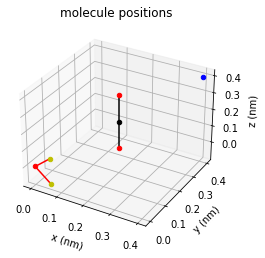

In [19]:
#define molecule anchor positions and orientations here
#below values are for just two molecules; to add more molecules to the list, add new elements to each array

#this example defines three CO2 molecules, positioned at (0,0,0), (0.2,0.2,0.2), (0.4,0.4,0.4) in the units used and with no rotation
xa=[0.0,0.2,0.4] #x coordinates of molecule anchors
ya=[0.0,0.2,0.4] #y coordinates of molecule anchors
za=[0.0,0.2,0.4] #z coordinates of molecule anchors
thetar=[0.0,0.0,0.0] #no theta rotation for any of the molecules
phir=[0.0,0.0,0.0] #no phi rotation for any of the molecules
moltypes=[1,0,2] #code to indicate what type of molecule each one is.  type=0 for CO2, 1 for water

#%matplotlib notebook

f1,ax1=mol_plot(moltypes,xa,ya,za,phir,thetar)
#add labels
ax1.set_xlabel('x (nm)')
ax1.set_ylabel('y (nm)')
ax1.set_zlabel('z (nm)')
ax1.set_title('molecule positions')
ax1.set_aspect('auto')
#ax1.view_init(elev=10., azim=30.) #adjust 'camera angle' with this command if desired - angles are in degrees
f1.show()



#Example of calling function allatomposns() to get the coordinates and charges of all atoms in a list
rall,qall=allatomposns(moltypes,xa,ya,za,phir,thetar)

#print('Positions: ',rall)
#print('Charges: ',qall)
#print('Position of atom 0:',rall[0])
#print('Charge of atom 0:',qall[0])

You can control the camera angle for the 3d plot either using the command provided in the code or (most conveniently) interactively by dragging with the mouse on the figure. If this does not work interactively in the Jupyter notebook, try uncommenting the 'magic command' at the very top of the notebook and restarting the kernel and re-running the code, or you could also download the code as a .py and run it in Spyder or another Python interface.

To understand how the molecule rotation angles work, make the following changes to the molecule orientations and check that the resulting positions are as you expect:
- molecule at the origin, rotation of theta=pi/8; phi=0.
- molecule at the origin, rotation of phi=pi/8; theta=0.
- The previous check should give the same result as the initial code: since the orientation of the molecule is along the z-axis, it looks the same after a rotation in the xy plane, around the z-axis (which is what a phi rotation is). Try changing the definition of the base molecule so that the molecule is instead along the x-axis and repeat the last two checks.
- molecule at [1,1,1], rotation of theta=pi/8; phi=0.
- more than one molecule at different positions; try different rotations for different molecules.

You don't need to include these in your report; they are just to help you check you understand how the code works.

In [20]:
# checked

Now modify the code by editing the incomplete atom_base_posns function so that it works for water as well, as follows:

The water molecule is quite polar.  Each O-H bond has a dipole moment and its overall dipole moment is 1.85 Debyes.  
To model the water molecule, consider the effective charge on each atom to be such as to give the dipole moment of each O-H bond - i.e., the magnitude of the charge on the O atom will be less than 2e!  This is a simplified way of describing the molecule, but we will use it here. Take the angle between the two O-H bonds to be fixed at 104.5$^\circ$ and take each O-H bond to have a fixed length of 96pm.

In [21]:
# Done!

Now distribute 6 water molecules so that the position of the O atom in each is completely random within a cube with side length 1nm.  Make the orientation of each molecule random as well.  Hint: make use of numpy's random function (see below).

Use the mol_plot function above to display the positions of the water molecules on a 3D plot. Try re-running your code several times to check it's working as you expect.

<ipython-input-22-62c95bb9a985>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()


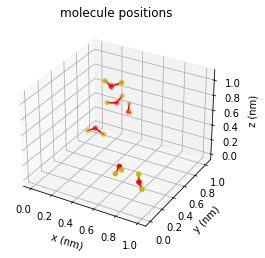

In [22]:
#define molecule anchor positions and orientations here
#below values are for just two molecules; to add more molecules to the list, add new elements to each array

#this example defines three CO2 molecules, positioned at (0,0,0), (0.2,0.2,0.2), (0.4,0.4,0.4) in the units used and with no rotation
xa=np.random.rand(6) #x coordinates of molecule anchors
ya=np.random.rand(6) #y coordinates of molecule anchors
za=np.random.rand(6) #z coordinates of molecule anchors
thetar=np.random.rand(6)*np.pi*2 #no theta rotation for any of the molecules
phir=np.random.rand(6)*np.pi*2 #no phi rotation for any of the molecules
moltypes=[1,1,1,1,1,1] #code to indicate what type of molecule each one is.  type=0 for CO2, 1 for water

#%matplotlib notebook

f1,ax1=mol_plot(moltypes,xa,ya,za,phir,thetar)
#add labels
ax1.set_xlabel('x (nm)')
ax1.set_ylabel('y (nm)')
ax1.set_zlabel('z (nm)')
ax1.set_title('molecule positions')
ax1.set_aspect('auto')
#ax1.view_init(elev=10., azim=30.) #adjust 'camera angle' with this command if desired - angles are in degrees
f1.show()



#Example of calling function allatomposns() to get the coordinates and charges of all atoms in a list
rall,qall=allatomposns(moltypes,xa,ya,za,phir,thetar)

#print('Positions: ',rall)
#print('Charges: ',qall)
#print('Position of atom 0:',rall[0])
#print('Charge of atom 0:',qall[0])


# Use the function provided above to get the position coordinates of all 18 atoms and the corresponding charge
r_randMolecules = rall
q_randMolecules = qall

Use the function provided above to get the position coordinates of all 18 atoms and the corresponding charge

In [23]:
# Check the above code cell, functionlised as below
'''r_randMolecules = rall
q_randMolecules = qall'''

'r_randMolecules = rall\nq_randMolecules = qall'

Using the functions you already have, write some code which calculates the potential at a set of points along a line parallel to the x-axis, i.e. along (x,y$_1$,z$_1$) where y$_1$ and z$_1$ are constants and plot this out.

In [24]:
# Generate the test point align with x-axis

@interact
def make_plot(samp_y=(0, 1, 0.02),
              samp_z=(0, 1, 0.02)):
              
    num_samp = 100 # number of sampling along z axis
    samp_x = np.linspace(0,1,num_samp) #sampling length along z axis
    coord_samp = np.stack((samp_x, np.full(num_samp,samp_y),np.full(num_samp,samp_z)),axis=-1)
    
    #calculate potl for each test points          
    potl_molecules = []
    for i in coord_samp:
        potl_molecules.append(potl_sum(i,r_randMolecules,q_randMolecules))

    #plot potl for each test point           
    plt.figure(figsize=(8,5.5)) 
    plt.title('Electric field potential along x axis',fontsize=14)
    plt.plot(samp_x, potl_molecules, marker='')

    plt.xlabel('x')
    plt.ylabel('Potential (V)')
    plt.show();

interactive(children=(FloatSlider(value=0.0, description='samp_y', max=1.0, step=0.02), FloatSlider(value=0.0,…

Comment in your report how the form of the potential variation along the x-axis depends on the locations of the molecules and relate this to physics. Include in your report a 1D plot showing the variation of the potential through the centre of the cube parallel to the x-axis to illustrate what you are describing. For each of these plots, include also a plot of the corresponding configuration of molecules (as mol_plot generates)

## Investigations

Investigate (as described below) each of the following arrangements of molecules (and ions) in a 1nm-cube with sides parallel to the x,y and z axes:

(a) Six water molecules

(b) Six water molecules and a Na+ ion.

(c) Six water molecules in a uniform electric field in the +x direction (such as they might experience close to a planar charged sheet like an electrode in the yz plane). 

For each case:

Investigate how the potential energy of the collection depends on their location and orientation. 

Find the lowest potential energy arrangement you can. For this arrangement:
- find the energy of this arrangement in SI units, relative to the energy with all of the water molecules/ions separated by a large distance from one another.
- plot the configuration which leads to this lowest energy (and include it in your report)



Hint: a crude way to try to find the lowest energy would be to could repeatedly evaluate the potential energy for many randomly chosen configurations and see which one has the lowest energy. This is not the only or best way though.

For (b), in reality, the electron clouds around the oxygen and sodium nuclei would limit how close the oxygen atom and Na+ ion are allowed to approach (a quantum effect related to the Pauli exclusion principle). Since here you are making a classical model, you might need to introduce a sensible minimum distance of approach of the two nuclei.

For (c), one way to approach the problem would be to consider the dipoles.

In [25]:
'''[0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0] 
 [0.164609, 0.835391, 0.833444, 0.166556, 0.664609, 0.335391, 0.333444, 0.666556] 
 [0.439751, 0.939751, 0.565409, 0.065409, 0.439751, 0.939751, 0.565409, 0.065409]

 -1.7237695774930018e-63
 -1.7493207101374834e-63'''

'[0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0] \n [0.164609, 0.835391, 0.833444, 0.166556, 0.664609, 0.335391, 0.333444, 0.666556] \n [0.439751, 0.939751, 0.565409, 0.065409, 0.439751, 0.939751, 0.565409, 0.065409]\n\n -1.7237695774930018e-63\n -1.7493207101374834e-63'

In [26]:
#Degugging Part 1/3
#this example defines three CO2 molecules, positioned at (0,0,0), (0.2,0.2,0.2), (0.4,0.4,0.4) in the units used and with no rotation
xa=[0.5] #x coordinates of molecule anchors
ya=[0.5] #y coordinates of molecule anchors
za=[0.5] #z coordinates of molecule anchors
thetar=np.full(len(xa),0) #no theta rotation for any of the molecules
phir=[0] #no phi rotation for any of the molecules
moltypes=np.full(len(xa),1) #code to indicate what type of molecule each one is.  type=0 for CO2, 1 for water

rall,qall=allatomposns(moltypes,xa,ya,za,phir,thetar)

r_randMolecules = rall
q_randMolecules = qall
print(potl_energy_sum(rall,qall))


def yieldPotlEfield(num_samp,start_coord,end_coord):
    samp_x= np.linspace(start_coord,end_coord,num_samp) #sampling length along z axis
    samp_y= np.linspace(start_coord,end_coord,num_samp)
    samp_z= np.linspace(start_coord,end_coord,num_samp)
    samp_yy, samp_zz, samp_xx = np.meshgrid(samp_y, samp_z,samp_x)

    #calculate potl, Efield for each test points          
    potl_molecules = []
    Efield_molecule2D = []

    for i in range(len(samp_xx)):
        pinlistV1=[]
        pinlistE1_2D=[]
        for j in range(len(samp_xx[i])):
            pinlistV2=[]
            pinlistE2_2D=[]

            for k in range(len(samp_xx[i][j])):
                EfieldVectorL2D=[]
                r0 = np.array([samp_xx[i][j][k],samp_yy[i][j][k],samp_zz[i][j][k]])
                #Calcluate 1D potl for each in 3D
                pinlistV2.append(potl_sum(r0,r_randMolecules,q_randMolecules))
                
                #Calcluate 2D Efield (x,z) for each in 3D
                EfieldVector = Efield_sum(r0,r_randMolecules,q_randMolecules)
                EfieldVectorL2D.append(EfieldVector[0])
                EfieldVectorL2D.append(EfieldVector[1])
                pinlistE2_2D.append(EfieldVectorL2D)
            pinlistV1.append(pinlistV2)
            pinlistE1_2D.append(pinlistE2_2D)
        potl_molecules.append(pinlistV1)
        Efield_molecule2D.append(pinlistE1_2D)
    return samp_x, samp_y, samp_z, samp_yy, samp_zz, samp_xx, np.array(Efield_molecule2D), np.array(potl_molecules)


-1.3123192169132231e-27


In [27]:
print(rall,qall)

[array([0.5, 0.5, 0.5]), array([0.55863817, 0.5       , 0.57573225]), array([0.55863817, 0.5       , 0.42426775])] [-0.8043375515414669, 0.40216877577073346, 0.40216877577073346]


In [28]:
#Debugging Part 2/3
samp_x, samp_y, samp_z, samp_yy, samp_zz, samp_xx, Efield_molecule2D,potl_molecules = yieldPotlEfield(13,-0.5,1.5)
@interact
def make_plot_2(cmap=(0, 31, 1),elevpara=(-27,90,1),azimpara=(-117,0,1)):
    f1,ax1=mol_plot(moltypes,xa,ya,za,phir,thetar)
    ax1.set_xlabel('x (nm)')
    ax1.set_ylabel('y (nm)')
    ax1.set_zlabel('z (nm)')
    ax1.set_title('molecule positions')
    ax1.set_aspect('auto')
    ax1.view_init(elev=elevpara, azim=azimpara) #adjust 'camera angle' with this command if desired - angles are in degrees
    f1.show();

    cmapAll = [ 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo','nipy_spectral','flag', 'gist_ncar','Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c','twilight', 'twilight_shifted', 'hsv']
    cmapHere = cmapAll[cmap]
    
        
    # Creating figure
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    # Creating plot
    img = ax.scatter3D(samp_xx, samp_yy, samp_zz, c=potl_molecules, alpha=0.3, marker='.',cmap=cmapHere)
    ax.set_xlabel('x (nm)')
    ax.set_ylabel('y (nm)')
    ax.set_zlabel('z (nm)')
    ax.set_title('Molecule Potential')
    ax.view_init(elev=elevpara, azim=azimpara)
    fig.colorbar(img)
    plt.show();


<ipython-input-3-57180fe704f0>:5: RuntimeWarning: divide by zero encountered in double_scalars
  V=K * (q1*e/dist(r0,r1))
<ipython-input-4-9e2a8d8ade7a>:3: RuntimeWarning: divide by zero encountered in double_scalars
  E=K* (q1*e/dist(r0,r1)**2)*unit_v(r0,r1)
<ipython-input-2-62e7603103c4>:15: RuntimeWarning: invalid value encountered in true_divide
  return (-r1+r0) / np.linalg.norm((r1-r0))


interactive(children=(IntSlider(value=15, description='cmap', max=31), IntSlider(value=31, description='elevpa…

In [29]:
#Debugging Part 3/3
samp_x, samp_y, samp_z, samp_yy, samp_zz, samp_xx, Efield_molecule2D,potl_molecules = yieldPotlEfield(50,-0.5,1.5)
@interact
def plot_2(Z_Index=(0, len(potl_molecules), 1),Line_Width=(1,15,1)):
    #Slice the 3D value matrix to 2D
    Efield_molecule2D_2D = Efield_molecule2D[Z_Index]
    potl_molecules_2D = potl_molecules[Z_Index]
    #plot the first
    FACTOR = 5e-1
    levels = np.linspace(np.nanmin(potl_molecules_2D) * FACTOR, np.nanmax(potl_molecules_2D) * FACTOR, 50)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.contour(samp_x, samp_y, potl_molecules_2D, levels)

    lw = np.linalg.norm(Efield_molecule2D_2D, axis=2)
    lw /= lw.max()
    ax.streamplot(samp_x, samp_y, Efield_molecule2D_2D[:, :, 0], Efield_molecule2D_2D[:, :, 1], linewidth=Line_Width*lw, density=2,color='sienna')
    ax.set_xlabel('x (nm)')
    ax.set_ylabel('y (nm)')
    ax.set_title('Molecule Potential')
    ax.axis('equal')


    #plot the second
    fig, ax = plt.subplots()
    mappable = ax.pcolormesh(samp_x, samp_y, potl_molecules_2D)
    ax.set_xlabel('x (nm)')
    ax.set_ylabel('y (nm)')
    ax.set_title('Molecule Potential')
    plt.colorbar(mappable);


interactive(children=(IntSlider(value=25, description='Z_Index', max=50), IntSlider(value=8, description='Line…